# UTTARAKHAND

In [657]:
import pandas as pd

# Load the datasets for Uttarakhand
df_uk_enrolment = pd.read_csv('/content/Uttrakhand Enrolment Dataset.csv')
df_uk_demographic = pd.read_csv('/content/Uttrakhand Demographic Dataset.csv')
df_uk_biometric = pd.read_csv('/content/Uttrakhand Biometric Dataset.csv')

print("Uttrakhand Enrolment Dataset:")
print(df_uk_enrolment.head())
print(df_uk_enrolment.info())
print(df_uk_enrolment.describe())

print("\nUttrakhand Demographic Dataset:")
print(df_uk_demographic.head())
print(df_uk_demographic.info())
print(df_uk_demographic.describe())

print("\nUttrakhand Biometric Dataset:")
print(df_uk_biometric.head())
print(df_uk_biometric.info())
print(df_uk_biometric.describe())

Uttrakhand Enrolment Dataset:
         date        state  district  pincode  age_0_5  age_5_17  \
0  15-03-2025  Uttarakhand  Haridwar   247667       17        15   
1  03-09-2025  Uttarakhand   Chamoli   246427        2         0   
2  03-09-2025  Uttarakhand  Dehradun   248008        5         0   
3  03-09-2025  Uttarakhand  Dehradun   248009        2         0   
4  03-09-2025  Uttarakhand  Dehradun   248121        1         0   

   age_18_greater  
0              28  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            11902 non-null  object
 1   state           11902 non-null  object
 2   district        11902 non-null  object
 3   pincode         11902 non-null  int64 
 4   age_0_5         11902 non-null  int64 
 5   age_5_17        1190

In [658]:
df_uk_enrolment['date'] = pd.to_datetime(df_uk_enrolment['date'], format='%d-%m-%Y')
df_uk_demographic['date'] = pd.to_datetime(df_uk_demographic['date'], format='%d-%m-%Y')
df_uk_biometric['date'] = pd.to_datetime(df_uk_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_uk_enrolment:")
print(df_uk_enrolment.info())
print("\nData types after conversion for df_uk_demographic:")
print(df_uk_demographic.info())
print("\nData types after conversion for df_uk_biometric:")
print(df_uk_biometric.info())

Data types after conversion for df_uk_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            11902 non-null  datetime64[ns]
 1   state           11902 non-null  object        
 2   district        11902 non-null  object        
 3   pincode         11902 non-null  int64         
 4   age_0_5         11902 non-null  int64         
 5   age_5_17        11902 non-null  int64         
 6   age_18_greater  11902 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 651.0+ KB
None

Data types after conversion for df_uk_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26649 entries, 0 to 26648
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           26649 non-null  d

In [659]:
merged_uk_df_temp = pd.merge(df_uk_enrolment, df_uk_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_uk_merged = pd.merge(merged_uk_df_temp, df_uk_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_uk_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_uk_merged[numeric_cols] = df_uk_merged[numeric_cols].fillna(0)

print("Merged Uttarakhand DataFrame (df_uk_merged) head:")
print(df_uk_merged.head())
print("\nMerged Uttarakhand DataFrame (df_uk_merged) info:")
print(df_uk_merged.info())

Merged Uttarakhand DataFrame (df_uk_merged) head:
        date        state district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Uttarakhand   Almora   263601      0.0       0.0   
1 2025-03-01  Uttarakhand   Almora   263601      0.0       0.0   
2 2025-03-01  Uttarakhand   Almora   263621      0.0       0.0   
3 2025-03-01  Uttarakhand   Almora   263621      0.0       0.0   
4 2025-03-01  Uttarakhand   Almora   263622      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           55.0         561.0           0.0          0.0  
1             0.0           55.0         561.0           0.0          0.0  
2             0.0           11.0          87.0           0.0          0.0  
3             0.0           11.0          87.0           0.0          0.0  
4             0.0           23.0         207.0           0.0          0.0  

Merged Uttarakhand DataFrame (df_uk_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [660]:
print("Shape of df_uk_merged:", df_uk_merged.shape)
print("\nInfo of df_uk_merged:")
df_uk_merged.info()
print("\nDescription of df_uk_merged:")
print(df_uk_merged.describe())

Shape of df_uk_merged: (38552, 11)

Info of df_uk_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38552 entries, 0 to 38551
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            38552 non-null  datetime64[ns]
 1   state           38552 non-null  object        
 2   district        38552 non-null  object        
 3   pincode         38552 non-null  int64         
 4   age_0_5         38552 non-null  float64       
 5   age_5_17        38552 non-null  float64       
 6   age_18_greater  38552 non-null  float64       
 7   demo_age_5_17   38552 non-null  float64       
 8   demo_age_17_    38552 non-null  float64       
 9   bio_age_5_17    38552 non-null  float64       
 10  bio_age_17_     38552 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 3.2+ MB

Description of df_uk_merged:
                                date        pi

In [661]:
df_uk = df_uk_merged[df_uk_merged['state'] == 'Uttarakhand'].copy()
df_uk['year'] = df_uk['date'].dt.year
df_uk['month'] = df_uk['date'].dt.month

print("Shape of df_uk:", df_uk.shape)
print("\nFirst 5 rows of df_uk with new 'year' and 'month' columns:")
print(df_uk.head())

Shape of df_uk: (38552, 13)

First 5 rows of df_uk with new 'year' and 'month' columns:
        date        state district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Uttarakhand   Almora   263601      0.0       0.0   
1 2025-03-01  Uttarakhand   Almora   263601      0.0       0.0   
2 2025-03-01  Uttarakhand   Almora   263621      0.0       0.0   
3 2025-03-01  Uttarakhand   Almora   263621      0.0       0.0   
4 2025-03-01  Uttarakhand   Almora   263622      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           55.0         561.0           0.0          0.0   
1             0.0           55.0         561.0           0.0          0.0   
2             0.0           11.0          87.0           0.0          0.0   
3             0.0           11.0          87.0           0.0          0.0   
4             0.0           23.0         207.0           0.0          0.0   

   year  month  
0  2025      3  
1  2025      3  
2

In [662]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_uk_agg = df_uk.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_uk_agg) head:")
print(df_uk_agg.head())
print("\nAggregated DataFrame (df_uk_agg) info:")
print(df_uk_agg.info())

Aggregated DataFrame (df_uk_agg) head:
   year  month        state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Uttarakhand     Almora      0.0       0.0             0.0   
1  2025      3  Uttarakhand  Bageshwar      0.0       0.0             0.0   
2  2025      3  Uttarakhand    Chamoli      0.0       0.0             0.0   
3  2025      3  Uttarakhand  Champawat      0.0       0.0             0.0   
4  2025      3  Uttarakhand   Dehradun    123.0      43.0            10.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          338.0        3046.0         519.0        648.0  
1          167.0        1540.0         314.0        812.0  
2          269.0        3809.0         432.0        649.0  
3          340.0        3394.0         710.0       1712.0  
4         1384.0       13223.0        1161.0       1846.0  

Aggregated DataFrame (df_uk_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 11 col

In [663]:
import numpy as np

# 1. Create 'totalenrolments' column
df_uk_agg['totalenrolments'] = df_uk_agg['age_0_5'] + df_uk_agg['age_5_17'] + df_uk_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_uk_agg['childenrolments'] = df_uk_agg['age_0_5'] + df_uk_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_uk_agg['totaldemoupdates'] = df_uk_agg['demo_age_5_17'] + df_uk_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_uk_agg['totalbioupdates'] = df_uk_agg['bio_age_5_17'] + df_uk_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_uk_agg['CES'] = np.where(
    df_uk_agg['totalenrolments'] == 0,
    0,
    df_uk_agg['childenrolments'] / df_uk_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_uk_agg['DUR'] = np.where(
    df_uk_agg['totalenrolments'] == 0,
    0,
    df_uk_agg['totaldemoupdates'] / df_uk_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_uk_agg['BUR'] = np.where(
    df_uk_agg['totalenrolments'] == 0,
    0,
    df_uk_agg['totalbioupdates'] / df_uk_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_uk_agg) with new metrics head:")
print(df_uk_agg.head())

Aggregated DataFrame (df_uk_agg) with new metrics head:
   year  month        state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Uttarakhand     Almora      0.0       0.0             0.0   
1  2025      3  Uttarakhand  Bageshwar      0.0       0.0             0.0   
2  2025      3  Uttarakhand    Chamoli      0.0       0.0             0.0   
3  2025      3  Uttarakhand  Champawat      0.0       0.0             0.0   
4  2025      3  Uttarakhand   Dehradun    123.0      43.0            10.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          338.0        3046.0         519.0        648.0              0.0   
1          167.0        1540.0         314.0        812.0              0.0   
2          269.0        3809.0         432.0        649.0              0.0   
3          340.0        3394.0         710.0       1712.0              0.0   
4         1384.0       13223.0        1161.0       1846.0            176.0   

   childenro

In [664]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_uk_agg['Enorm'] = df_uk_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_uk_agg['Dnorm'] = df_uk_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_uk_agg['Bnorm'] = df_uk_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_uk_agg['stdnorm'] = (df_uk_agg['Enorm'] + df_uk_agg['Dnorm'] + df_uk_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_uk_agg['ALBI'] = 1 - df_uk_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_uk_agg['ALBI'] = df_uk_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_uk_agg) with normalized metrics and ALBI head:")
print(df_uk_agg.head())

Aggregated DataFrame (df_uk_agg) with normalized metrics and ALBI head:
   year  month        state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Uttarakhand     Almora      0.0       0.0             0.0   
1  2025      3  Uttarakhand  Bageshwar      0.0       0.0             0.0   
2  2025      3  Uttarakhand    Chamoli      0.0       0.0             0.0   
3  2025      3  Uttarakhand  Champawat      0.0       0.0             0.0   
4  2025      3  Uttarakhand   Dehradun    123.0      43.0            10.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          338.0        3046.0         519.0  ...            3384.0   
1          167.0        1540.0         314.0  ...            1707.0   
2          269.0        3809.0         432.0  ...            4078.0   
3          340.0        3394.0         710.0  ...            3734.0   
4         1384.0       13223.0        1161.0  ...           14607.0   

   totalbioupdates       CES        DU

In [665]:
df_uk_agg['Enormrisk'] = 1 - df_uk_agg['Enorm']
df_uk_agg['CESrisknorm'] = 1 - df_uk_agg['CES']
df_uk_agg['DURrisknorm'] = 1 - df_uk_agg['DUR']
df_uk_agg['BURrisknorm'] = 1 - df_uk_agg['BUR']
df_uk_agg['ALBIrisknorm'] = 1 - df_uk_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_uk_agg['riskscore'] = (
    df_uk_agg['Enormrisk'] +
    df_uk_agg['CESrisknorm'] +
    df_uk_agg['DURrisknorm'] +
    df_uk_agg['BURrisknorm'] +
    df_uk_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_uk_agg) with risk components and riskscore head:")
print(df_uk_agg.head())

Aggregated DataFrame (df_uk_agg) with risk components and riskscore head:
   year  month        state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Uttarakhand     Almora      0.0       0.0             0.0   
1  2025      3  Uttarakhand  Bageshwar      0.0       0.0             0.0   
2  2025      3  Uttarakhand    Chamoli      0.0       0.0             0.0   
3  2025      3  Uttarakhand  Champawat      0.0       0.0             0.0   
4  2025      3  Uttarakhand   Dehradun    123.0      43.0            10.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          338.0        3046.0         519.0  ...  0.116790  0.072108   
1          167.0        1540.0         314.0  ...  0.058913  0.069559   
2          269.0        3809.0         432.0  ...  0.140742  0.066762   
3          340.0        3394.0         710.0  ...  0.128870  0.150121   
4         1384.0       13223.0        1161.0  ...  0.504124  0.186486   

    stdnorm      ALBI  E

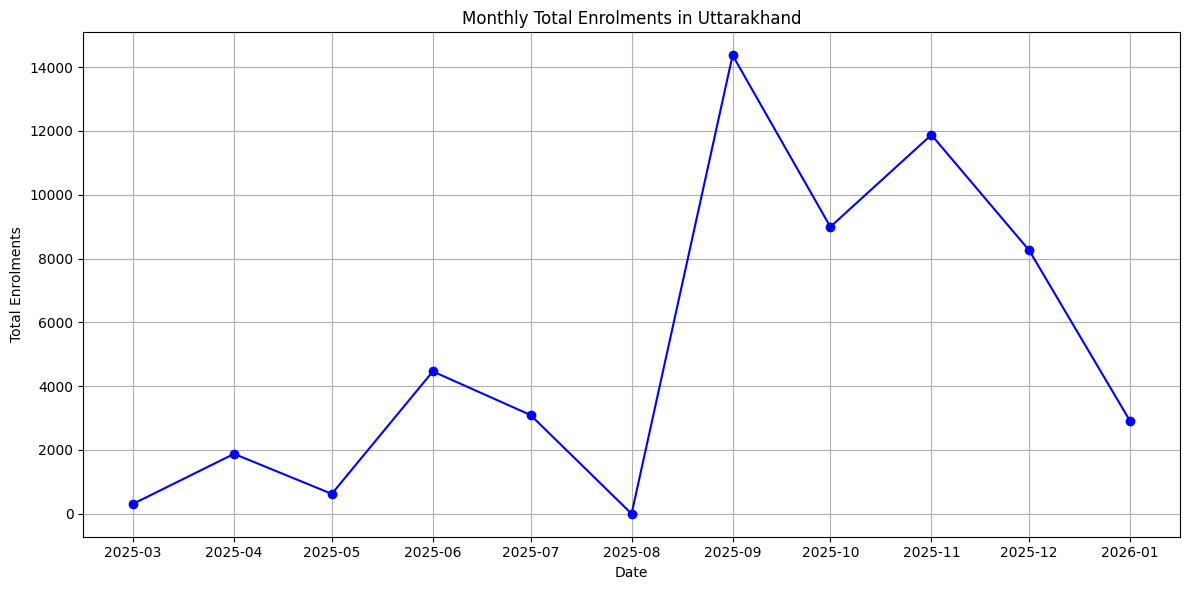

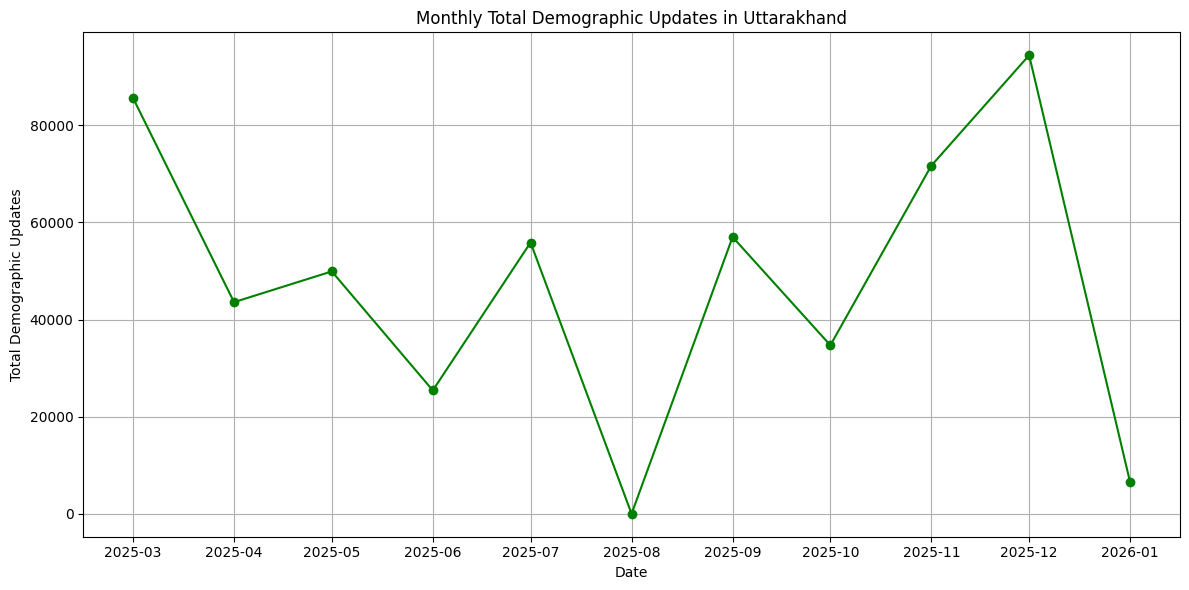

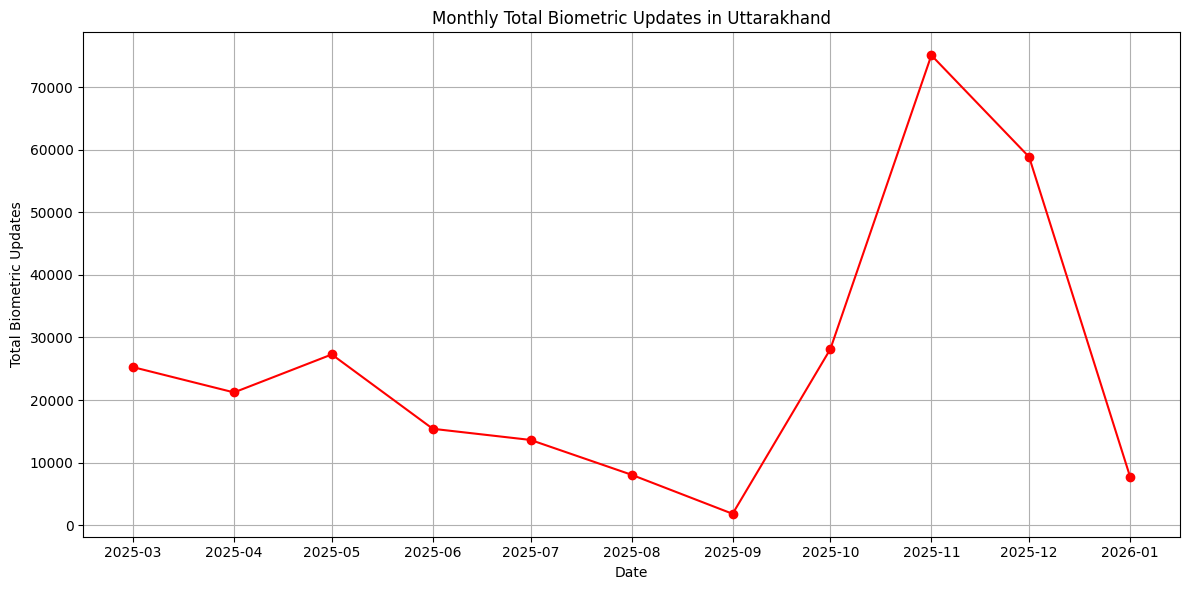

Monthly trend plots generated successfully.


In [666]:
import matplotlib.pyplot as plt

df_monthly_trends = df_uk_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Uttarakhand')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Uttarakhand')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Uttarakhand')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

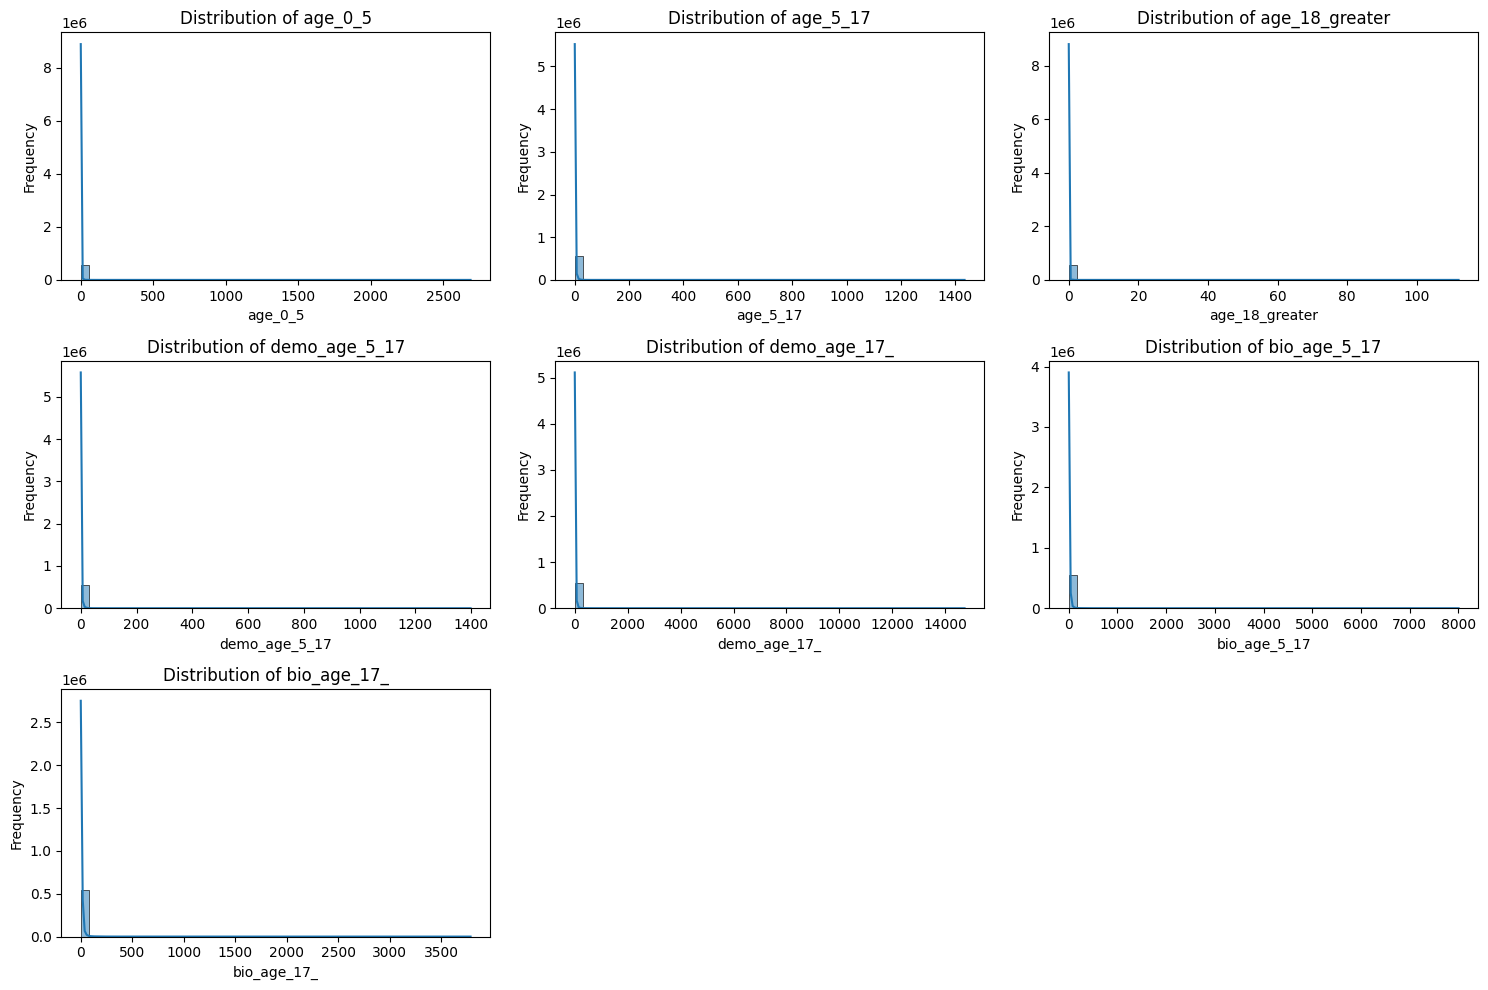

In [667]:
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_up_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

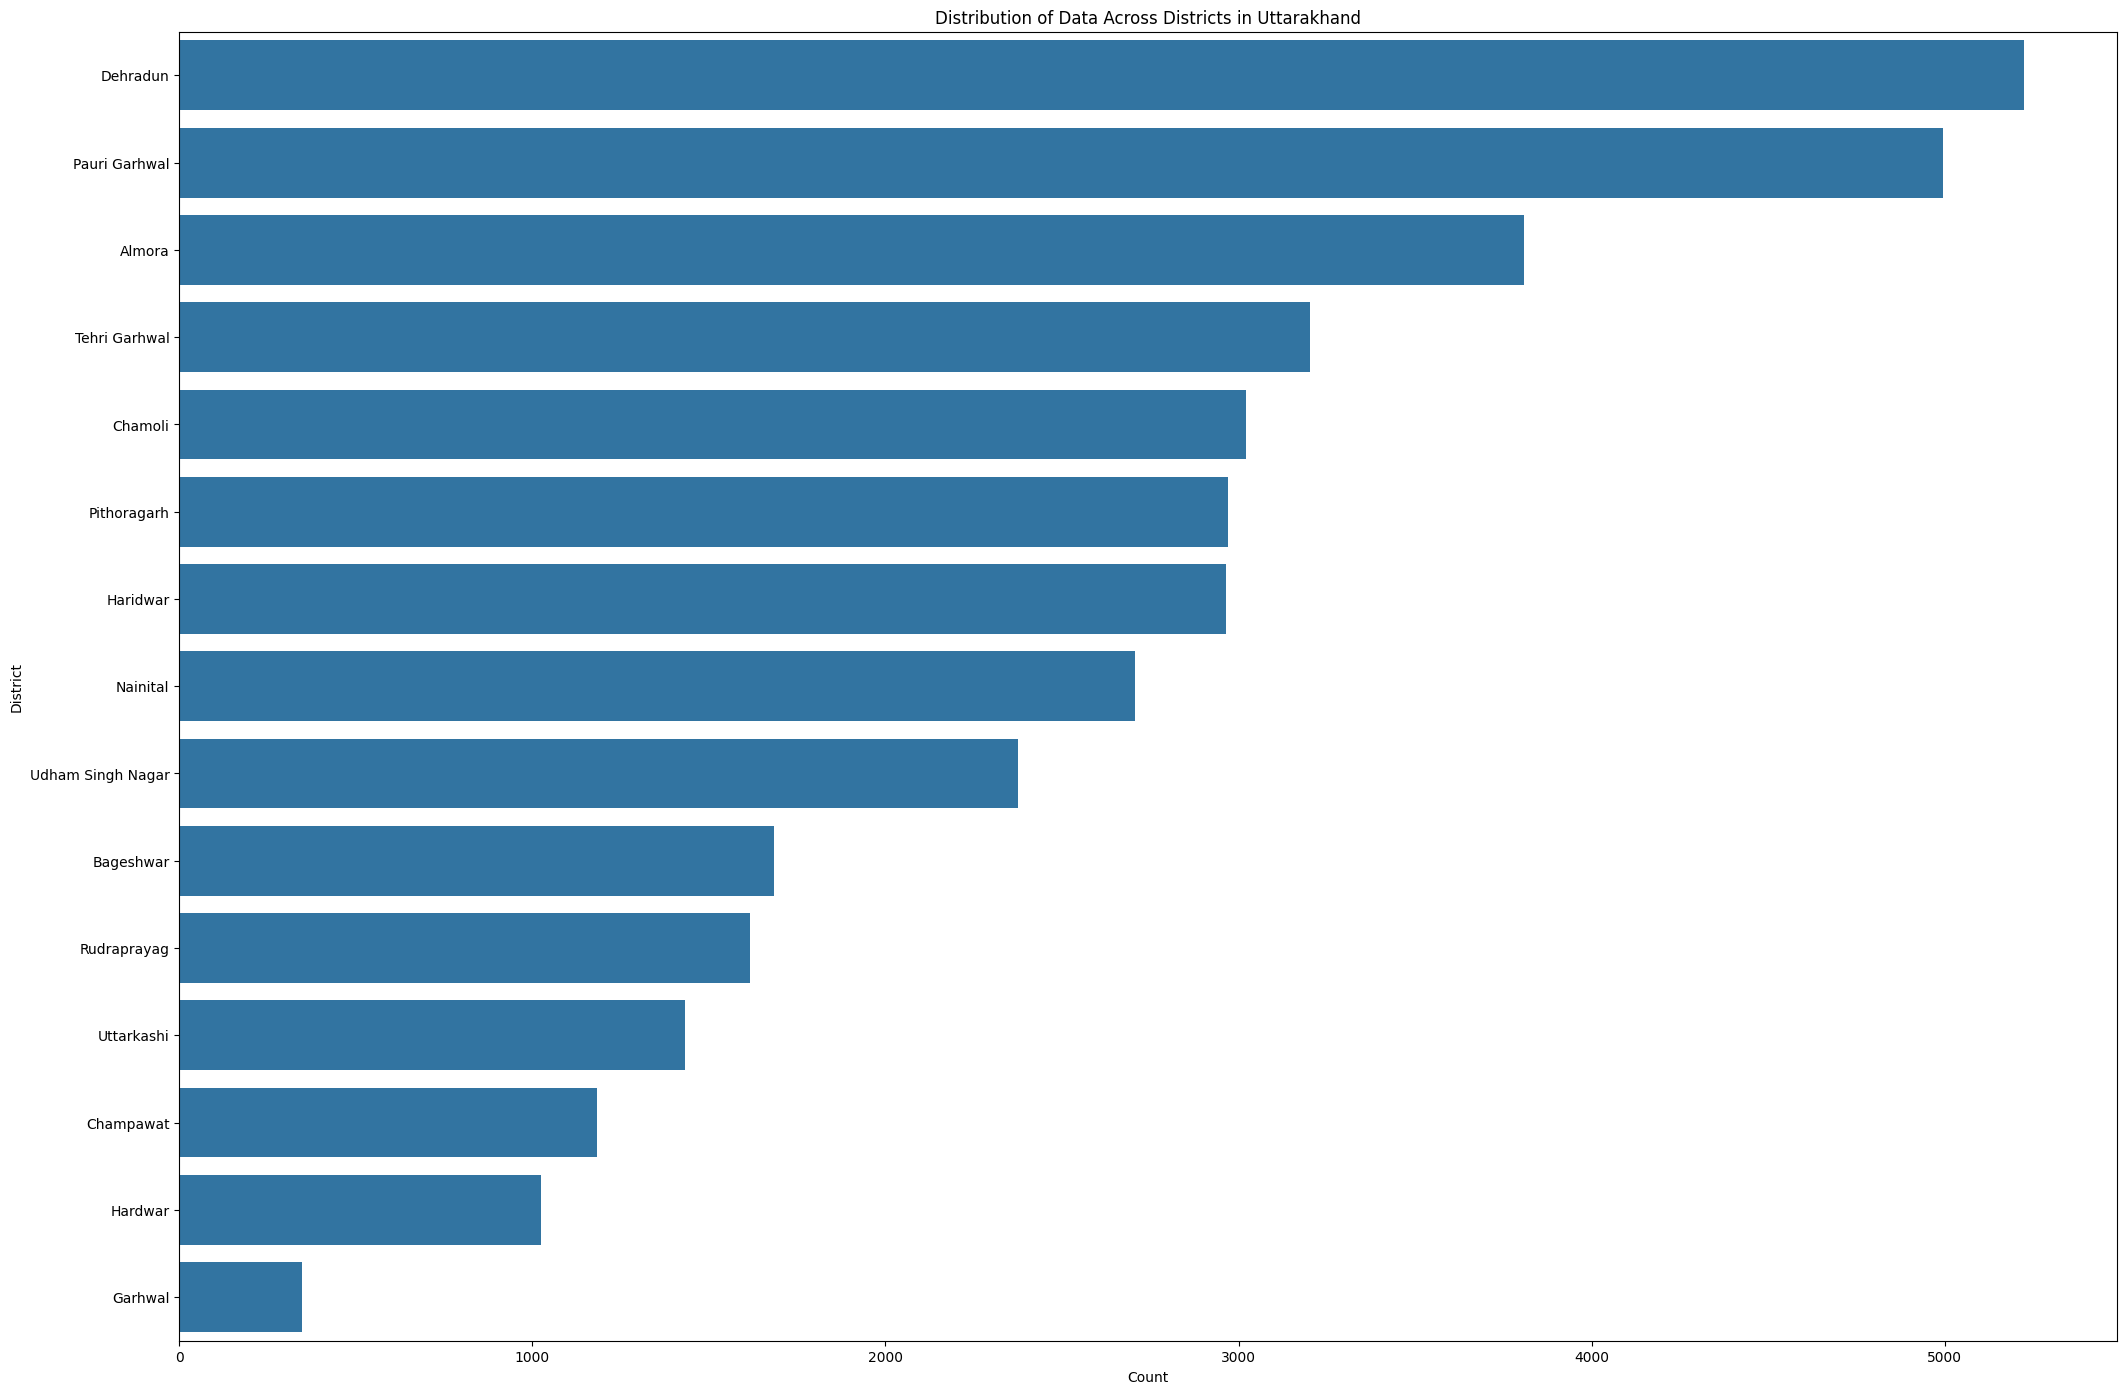

Count plot for 'district' displayed for Uttarakhand.


In [668]:
import seaborn as sns
plt.figure(figsize=(25, 17))
sns.countplot(data=df_uk_merged, y='district', order=df_uk_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Uttarakhand')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Uttarakhand.")

**Bivariate and Trivariate Analysis**

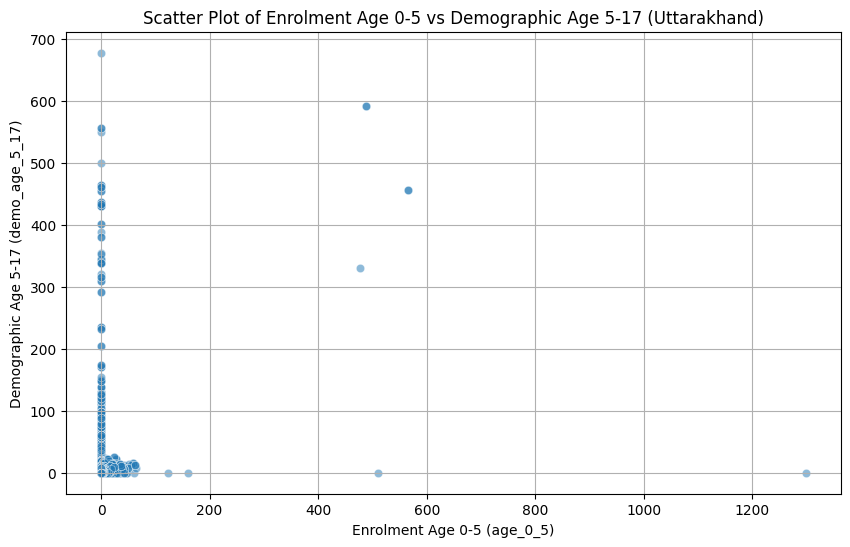

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables for Uttarakhand.


In [669]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_uk_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Uttarakhand)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables for Uttarakhand.")

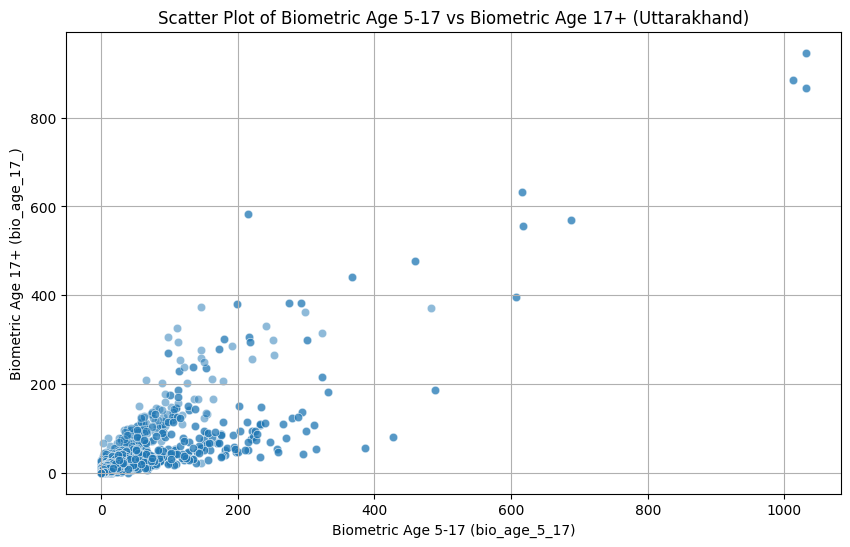

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other for Uttarakhand.


In [670]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_uk_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Uttarakhand)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other for Uttarakhand.")

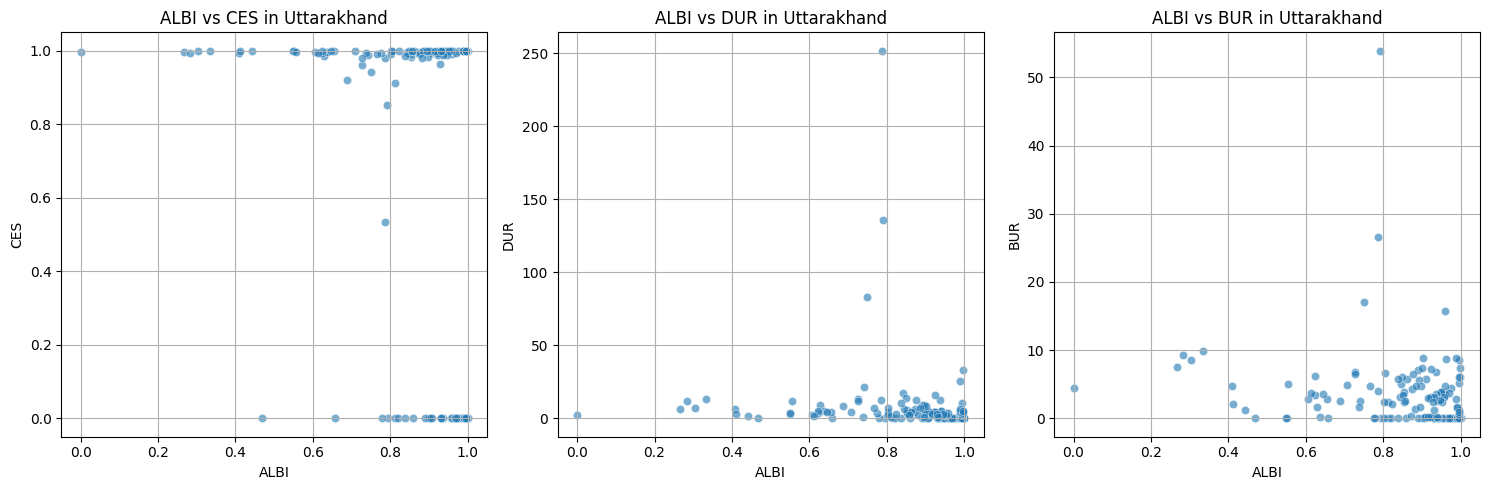

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_uk_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Uttarakhand')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

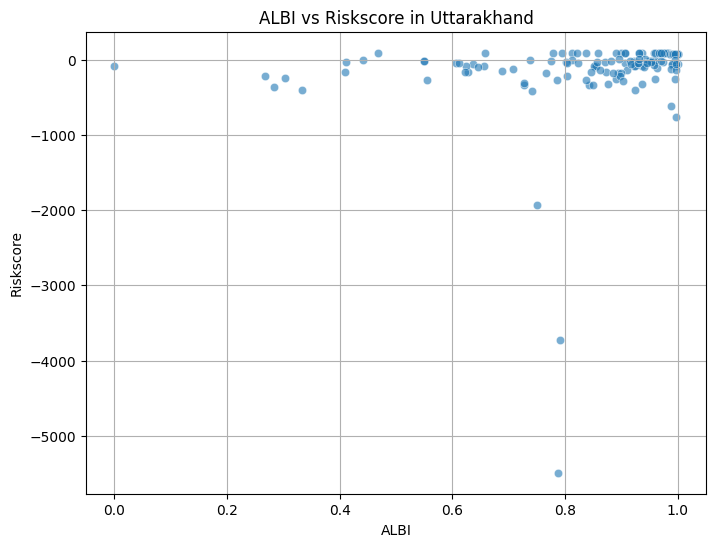

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Uttarakhand.


In [678]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_uk_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Uttarakhand')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Uttarakhand.")

Correlation Matrix for Uttarakhand:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.946711        0.537645       0.221313   
age_5_17        0.946711  1.000000        0.497062       0.187624   
age_18_greater  0.537645  0.497062        1.000000       0.230962   
demo_age_5_17   0.221313  0.187624        0.230962       1.000000   
demo_age_17_    0.285436  0.273484        0.213580       0.957212   
bio_age_5_17    0.020634  0.016889        0.002150       0.394322   
bio_age_17_     0.014216  0.013280        0.002987       0.421438   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.285436      0.020634     0.014216  
age_5_17            0.273484      0.016889     0.013280  
age_18_greater      0.213580      0.002150     0.002987  
demo_age_5_17       0.957212      0.394322     0.421438  
demo_age_17_        1.000000      0.379127     0.413107  
bio_age_5_17        0.379127      1.000000     0.868496  
bio_a

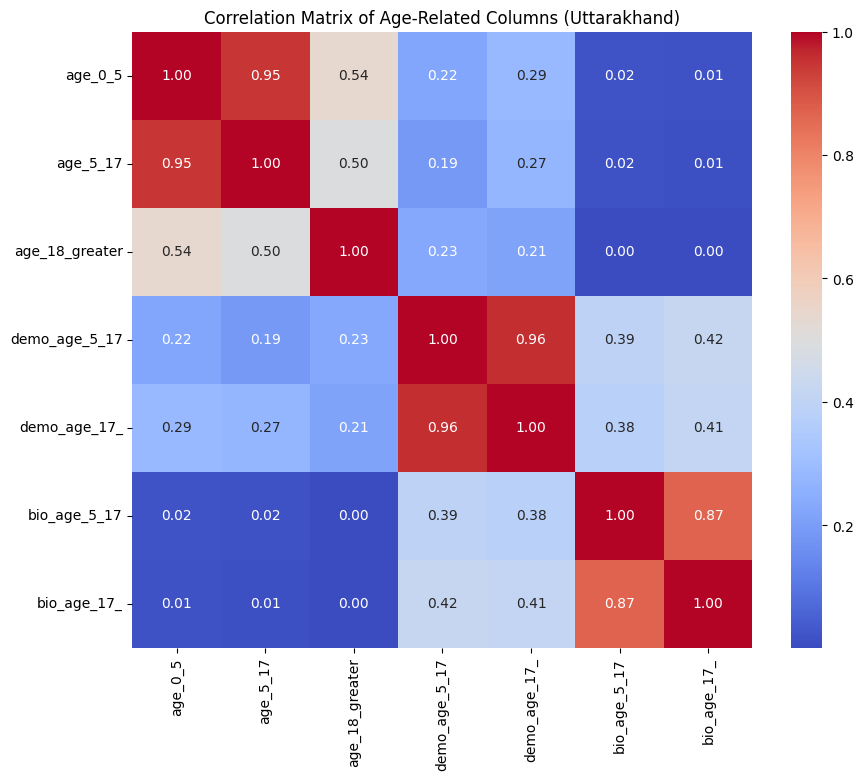

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources for Uttarakhand.


In [672]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_uk_merged[numerical_age_cols].corr()

print("Correlation Matrix for Uttarakhand:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Uttarakhand)')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources for Uttarakhand.")

District-wise average age-related data for Uttarakhand:
    district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0     Almora  0.503021  0.054899        0.002364       0.444182      3.827160   
1  Bageshwar  0.596439  0.066469        0.001780       0.470030      3.733531   
2    Chamoli  0.516385  0.050314        0.003641       0.362463      3.667660   
3  Champawat  1.018597  0.131023        0.002536       1.149620     10.845309   
4   Dehradun  1.979522  0.381053        0.034833       1.446507     13.689761   

   bio_age_5_17  bio_age_17_  
0      1.438666     1.502233  
1      1.894955     3.138279  
2      1.444224     1.872559  
3      3.273035     4.129332  
4      3.730909     3.966316  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        15 non-null     object 
 1   age_0_5         15 non-null  

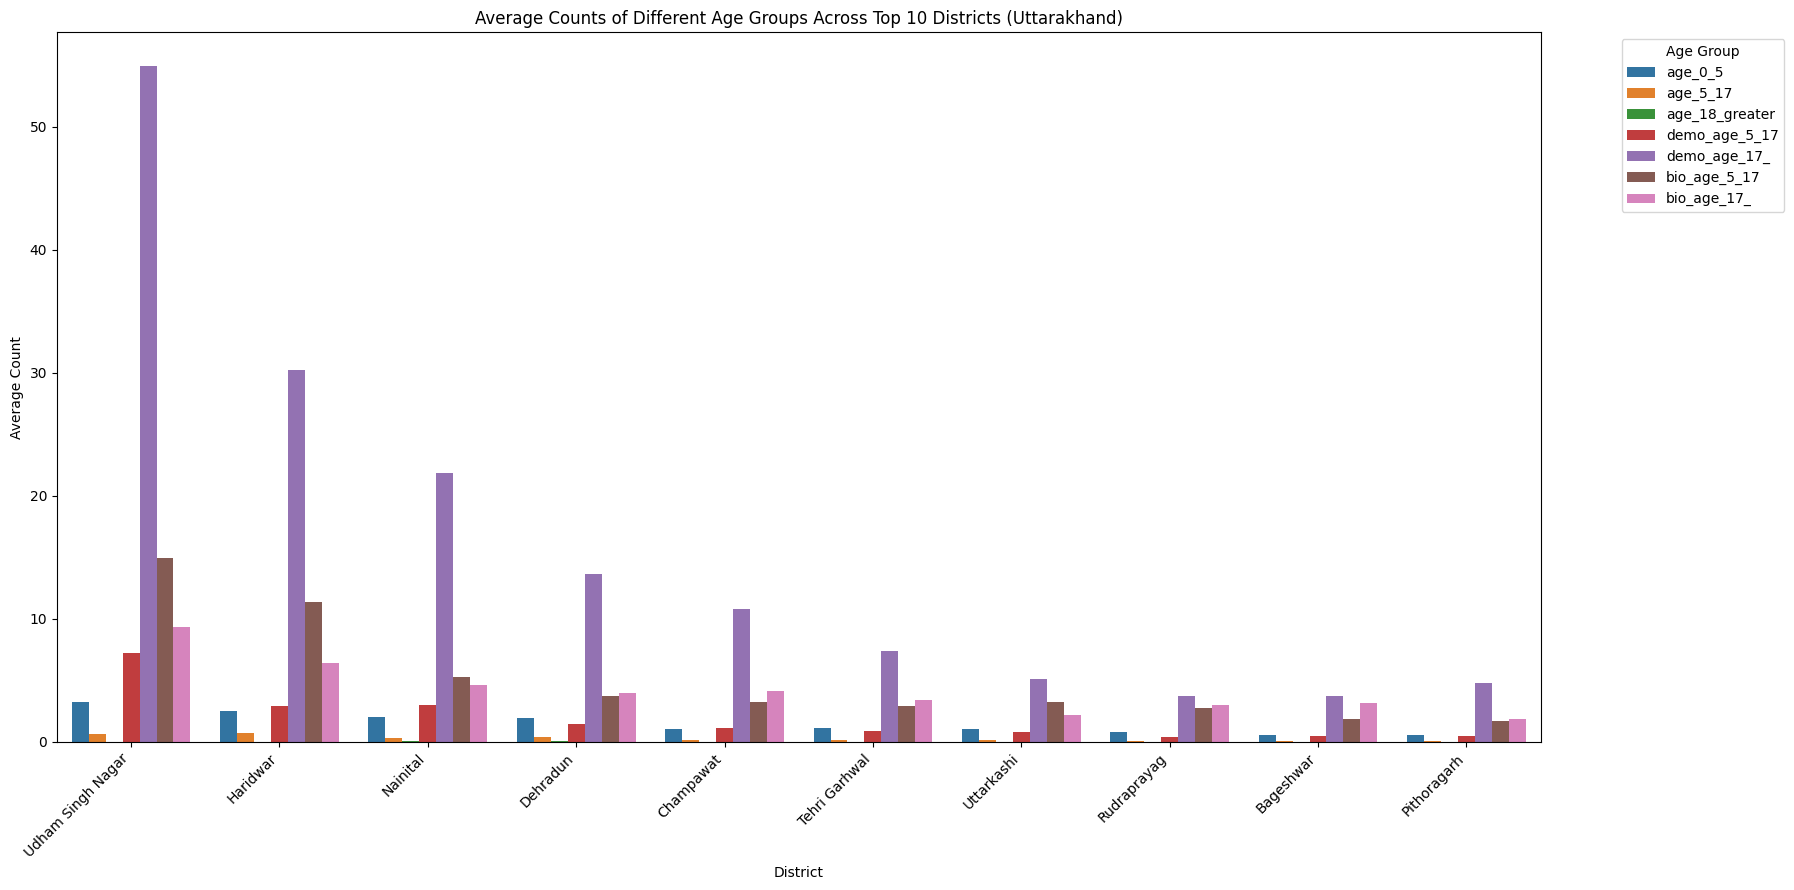

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top districts in Uttarakhand, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [673]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_uk_district_mean = df_uk_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Uttarakhand:")
print(df_uk_district_mean.head())
print(df_uk_district_mean.info())

df_uk_district_mean['total_avg_age'] = df_uk_district_mean[age_cols_to_group].sum(axis=1)

print("\nDistrict-wise average age-related data with total average age for Uttarakhand:")
print(df_uk_district_mean.head())
print(df_uk_district_mean.info())

# Adjust top N if there are fewer than 10 unique districts
num_districts_uk = df_uk_district_mean['district'].nunique()
top_n = min(10, num_districts_uk)

df_uk_district_mean_topn = df_uk_district_mean.nlargest(top_n, 'total_avg_age')

df_uk_district_mean_melted = df_uk_district_mean_topn.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_uk_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title(f'Average Counts of Different Age Groups Across Top {top_n} Districts (Uttarakhand)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top districts in Uttarakhand, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Uttarakhand:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0         8401.0       77228.0   
1 2025-03-15     17.0      15.0            28.0            0.0           0.0   
2 2025-03-20    169.0      61.0            21.0            0.0           0.0   
3 2025-04-01   1486.0     270.0           122.0         5690.0       37894.0   
4 2025-05-01    477.0     135.0            12.0         6265.0       43649.0   

   bio_age_5_17  bio_age_17_  
0       10364.0      14903.0  
1           0.0          0.0  
2           0.0          0.0  
3        9753.0      11474.0  
4       10723.0      12222.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            233 non-null    datet

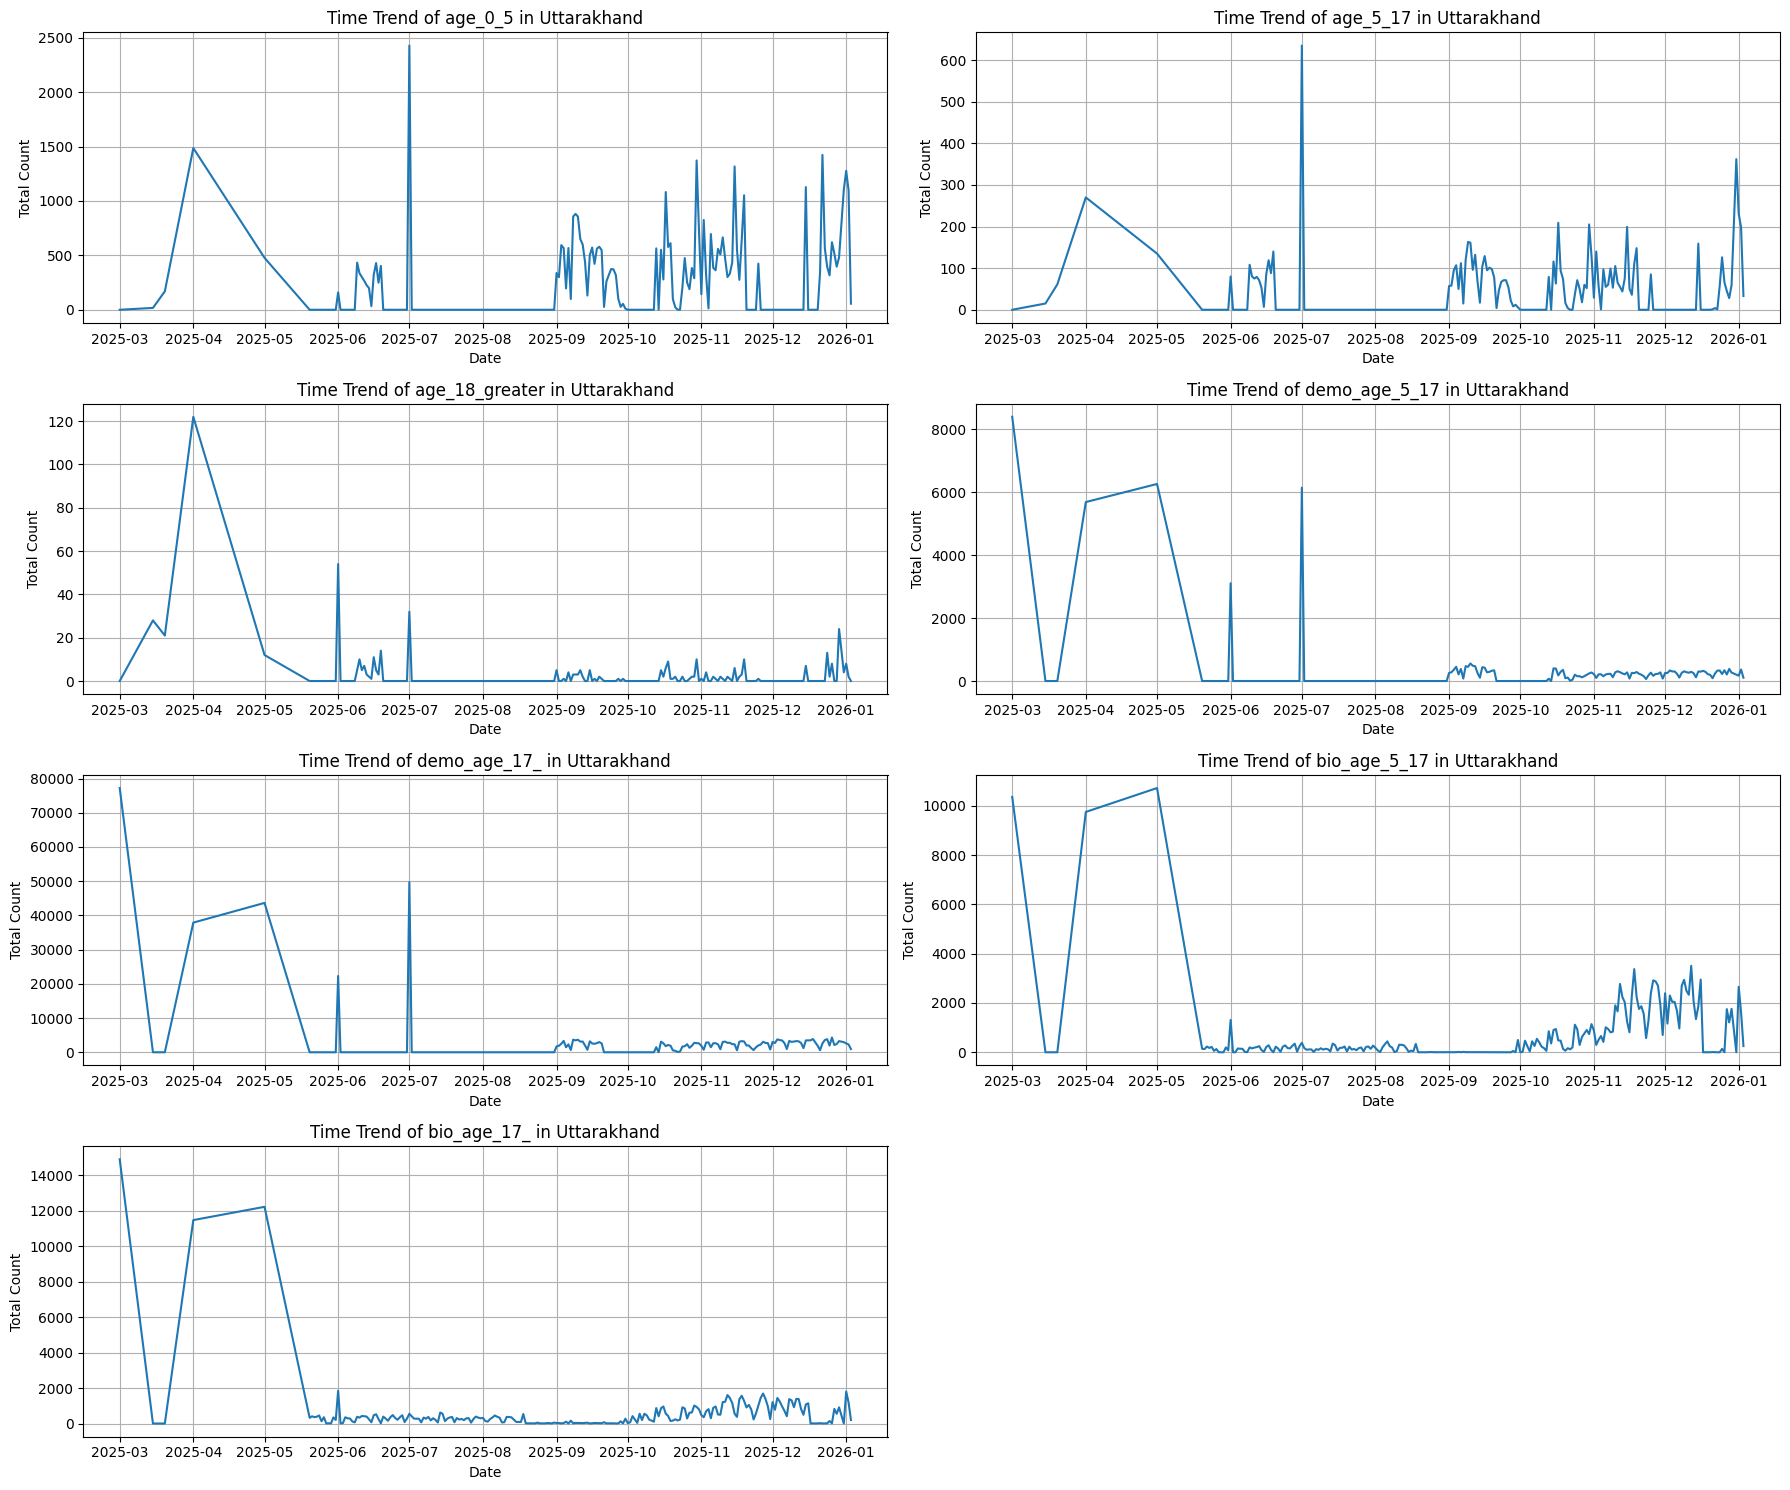

Insight: Line charts for each age-related column over time in Uttarakhand provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [674]:
df_uk_time_trend = df_uk_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Uttarakhand:")
print(df_uk_time_trend.head())
print(df_uk_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_uk_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Uttarakhand')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Uttarakhand provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

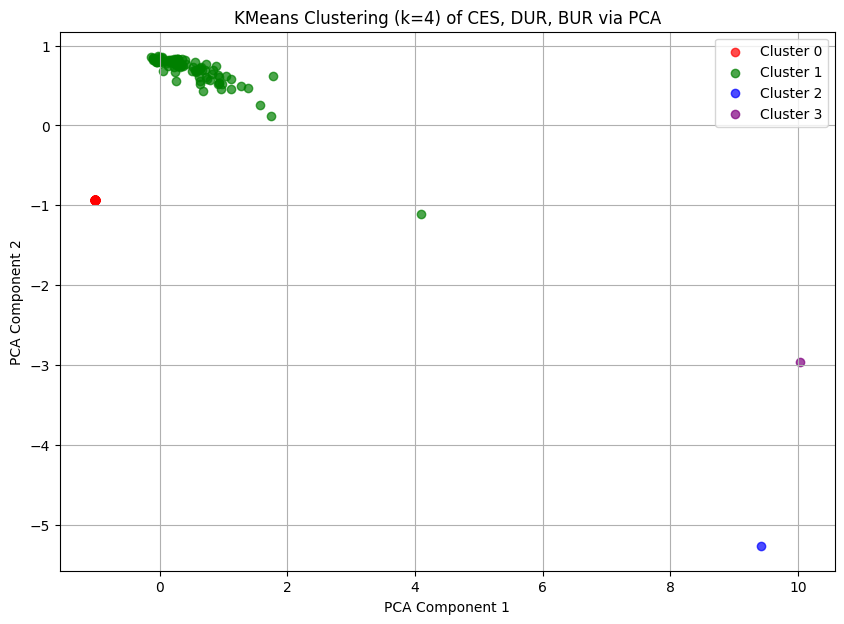

First 5 rows of df_uk_agg with 'clusterlabel' column:
   year  month        state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Uttarakhand     Almora      0.0       0.0             0.0   
1  2025      3  Uttarakhand  Bageshwar      0.0       0.0             0.0   
2  2025      3  Uttarakhand    Chamoli      0.0       0.0             0.0   
3  2025      3  Uttarakhand  Champawat      0.0       0.0             0.0   
4  2025      3  Uttarakhand   Dehradun    123.0      43.0            10.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          338.0        3046.0         519.0  ...  0.072108  0.062966   
1          167.0        1540.0         314.0  ...  0.069559  0.042824   
2          269.0        3809.0         432.0  ...  0.066762  0.069168   
3          340.0        3394.0         710.0  ...  0.150121  0.092997   
4         1384.0       13223.0        1161.0  ...  0.186486  0.250233   

       ALBI  Enormrisk  CESrisknorm  DURrisk

In [675]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_uk_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_uk_agg
df_uk_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_uk_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_uk_agg with 'clusterlabel' column:")
print(df_uk_agg.head())

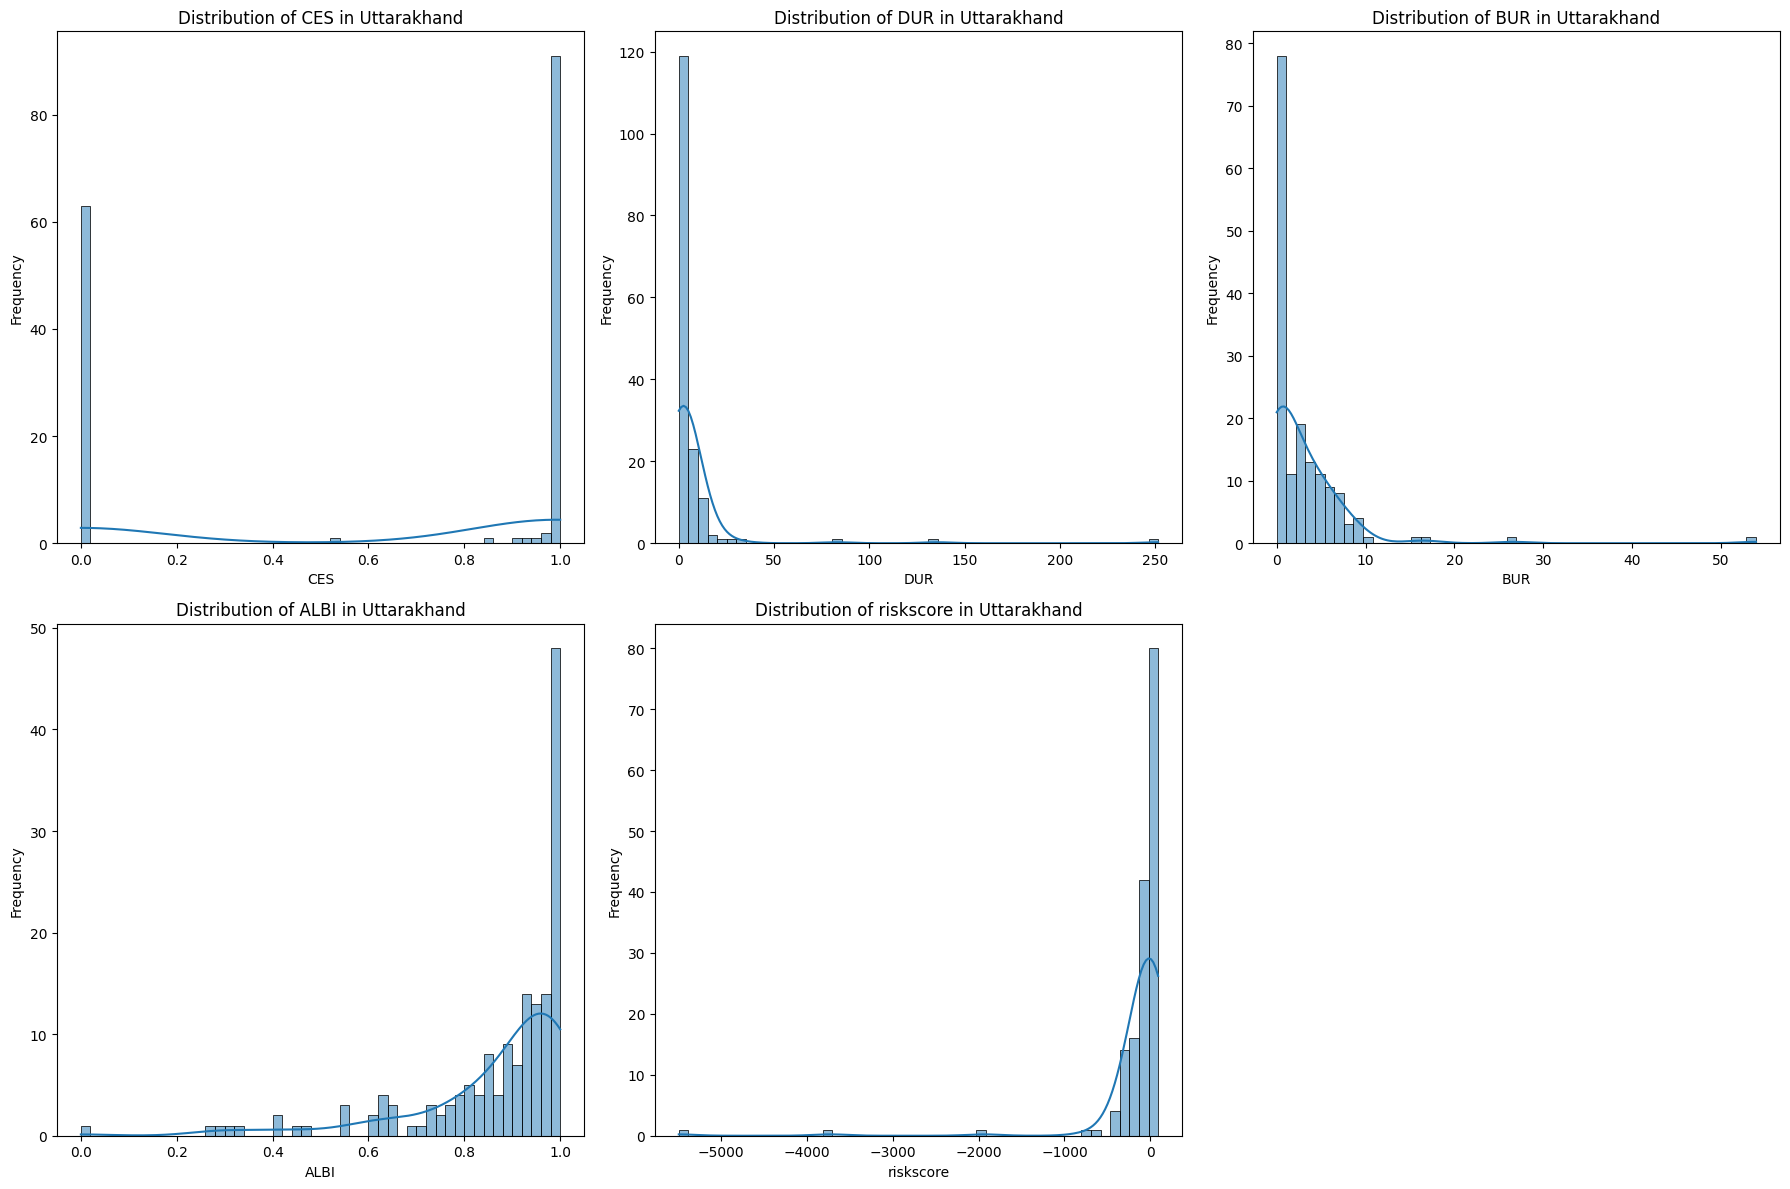

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [676]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_uk_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Uttarakhand')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [677]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_uk_agg['year'].max()
latest_month = df_uk_agg[df_uk_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_uk_agg for the latest year and month
df_latest_month = df_uk_agg[(df_uk_agg['year'] == latest_year) & (df_uk_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
     district      CES
       Almora 1.000000
    Bageshwar 1.000000
      Chamoli 1.000000
     Dehradun 1.000000
      Garhwal 1.000000
      Hardwar 1.000000
Pauri Garhwal 1.000000
   Uttarkashi 1.000000
  Rudraprayag 1.000000
     Haridwar 0.998175

Bottom 10 Districts by CES (Year 2026, Month 1):
         district      CES
        Champawat 0.964286
      Pithoragarh 0.980769
    Tehri Garhwal 0.992982
         Nainital 0.996552
Udham Singh Nagar 0.996759
         Haridwar 0.998175
        Bageshwar 1.000000
           Almora 1.000000
          Hardwar 1.000000
          Garhwal 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
         district      DUR
          Hardwar 5.000000
          Garhwal 3.666667
    Pauri Garhwal 3.000000
          Chamoli 2.950000
        Champawat 2.785714
         Dehradun 2.715278
Udham Singh Nagar 2.580227
    

## SUMMARY (Uttarakhand):

The Aadhaar lifecycle analysis for Uttarakhand reveals significant variations in enrolment and update activities across its districts. The `df_uk_agg` dataset, which aggregates data by month and district, serves as the foundation for calculating key performance indicators.

### Key Observations:

1.  **Data Aggregation and Metrics**: The initial datasets were successfully merged and cleaned, leading to the creation of `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates`. From these, derived metrics such as Child Enrolment Score (CES), Demographic Update Rate (DUR), and Biometric Update Rate (BUR) were calculated, with proper handling for division by zero.

2.  **Normalization and ALBI**: Min-max normalization was applied to key activity metrics (`totalenrolments`, `totaldemoupdates`, `totalbioupdates`) to create `Enorm`, `Dnorm`, and `Bnorm`. These were then combined to calculate `stdnorm` and the Aadhaar Lifecycle Balance Index (ALBI), providing a measure of balance between enrolment and update activities.

3.  **Risk Score**: A `riskscore` was computed by integrating risk-normalized versions of the key metrics. This score aims to identify districts that might face operational challenges due to imbalances or deficiencies in their Aadhaar lifecycle management.

4.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates showed temporal patterns, indicating periods of higher or lower activity. These trends can help in understanding seasonal variations or the impact of specific campaigns.

5.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Most districts (Almora, Bageshwar, Chamoli, Dehradun, Garhwal, Hardwar, Pauri Garhwal, Uttarkashi, Rudraprayag) showed a perfect score of 1.0, indicating that all enrolments were child enrolments in that period. Districts like Champawat (0.964) and Pithoragarh (0.981) had slightly lower but still high scores.
    *   **DUR (Demographic Update Rate)**: Hardwar (5.0) and Garhwal (3.67) led in demographic updates relative to total enrolments. Rudraprayag (1.02) and Uttarkashi (1.20) were among the lowest, suggesting lower update activity relative to enrolments.
    *   **BUR (Biometric Update Rate)**: Garhwal (6.0) and Udham Singh Nagar (4.43) had the highest biometric update rates. Hardwar (1.0) and Haridwar (1.19) were at the lower end, indicating areas where biometric updates are less frequent compared to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Hardwar (0.997) and Garhwal (0.996) exhibited the best balance, close to 1, while Udham Singh Nagar (0.0) and Dehradun (0.41) showed the least balance.
    *   **Risk Score**: Rudraprayag (13.85) and Uttarkashi (0.58) had the highest risk scores among the top 10. Several districts, including Garhwal (-133.26) and Udham Singh Nagar (-80.06), displayed negative risk scores. As noted in the West Bengal analysis, these negative scores suggest an issue with the interpretation or calculation of the risk score, as a risk score should ideally be bounded between 0 and 100. This anomaly requires further investigation to ensure the metric accurately reflects risk.

### Conclusion:

Uttarakhand exhibits diverse performance across its districts. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The anomalies in the `riskscore` calculation need to be addressed to ensure a meaningful risk assessment. Further investigation into districts with low DUR/BUR and imbalanced ALBI is recommended to identify underlying causes and implement targeted interventions.